# An Introduction to the DFT

## Lecture 3: Aliasing and Nyquist Frequency

In [1]:
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt
from scipy.io import wavfile
%matplotlib inline

#### Samples from the signal $y(t),\ t \in [0,1]$ at the rate of $fs = 5$ Hz. What is the sampling interval?

Answer: dt = 1/5 = 0.2 seconds.

In [3]:
fs = 5
L = 1
N = int(L*fs)
np.linspace(0,L,N, endpoint=False)

array([0. , 0.2, 0.4, 0.6, 0.8])

Aliasing:

In [4]:
ts = np.linspace(0, L, N, endpoint=False)
ys = np.sin(2 * np.pi * 1 * ts)

In [53]:
ts1 = np.linspace(0, L, 1000, endpoint=False)
ys1 = np.sin(2 * np.pi * 1 * ts1)

ys2 = np.sin(2 * np.pi * -4 * ts1)
ys3 = np.sin(2 * np.pi * 6 * ts1)
ys4 = np.sin(2 * np.pi * 11 * ts1)

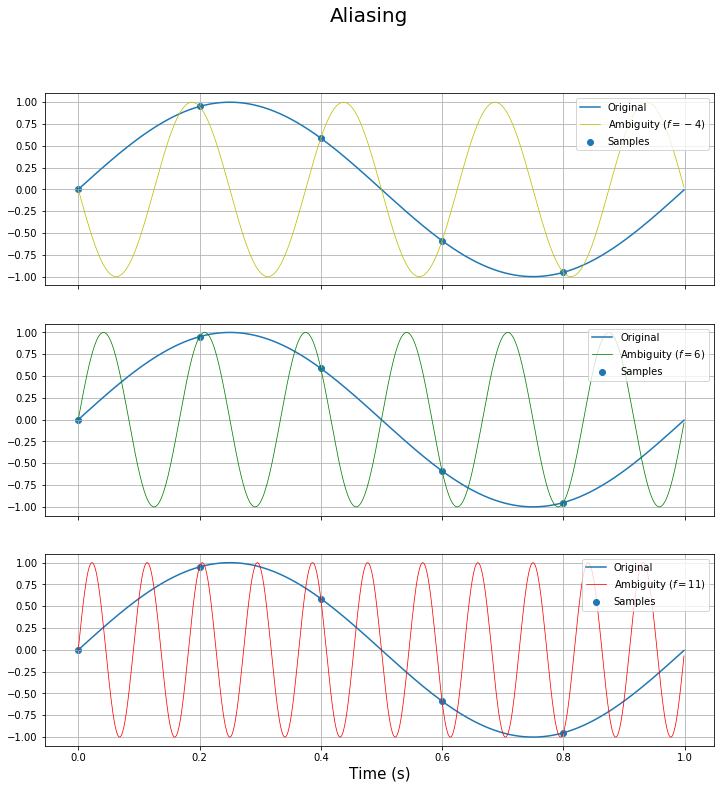

In [59]:
fig, ax = plt.subplots(nrows=3, figsize=(12,12), sharex=True)

fig.suptitle('Aliasing', fontsize=20)

ax[0].scatter(ts, ys, label='Samples')
ax[0].plot(ts1, ys1, label='Original')
ax[0].plot(ts1, ys2, label='Ambiguity ($f = -4$)', lw=0.75, c='y')

ax[1].scatter(ts, ys, label='Samples')
ax[1].plot(ts1, ys1, label='Original')
ax[1].plot(ts1, ys3, label='Ambiguity ($f = 6$)', lw=0.75, c='g')

ax[2].scatter(ts, ys, label='Samples')
ax[2].plot(ts1, ys1, label='Original')
ax[2].plot(ts1, ys4, label='Ambiguity ($f = 11$)', lw=0.75, c='r')

ax[2].set_xlabel('Time (s)', fontsize=15)

ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
ax[2].legend(loc='upper right')

ax[0].grid()
ax[1].grid()
ax[2].grid()

plt.show()

***

#### Reconstruction of a signal:

$$
y(t) = \sin (2\pi \cdot 1t) + \sin (2\pi \cdot 3t) + \sin(2\pi \cdot 4t),\ t \in [0,1]
$$

In [60]:
fs = 10
L = 1
N = int(L*fs)

In [73]:
freqs = [1, 3, 4]

t = np.linspace(0, L, N*100)
signal = sum([np.sin(2 * np.pi * f * t) for f in freqs])

ts = np.linspace(0, L, N)
ys = sum([np.sin(2 * np.pi * f * ts) for f in freqs])

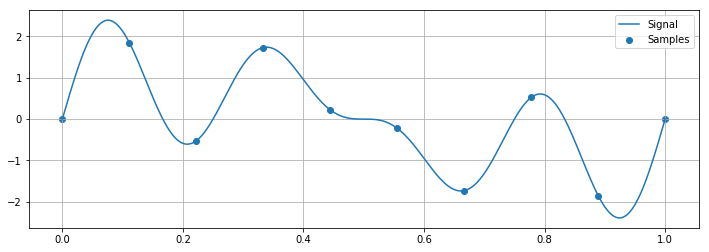

In [74]:
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(t, signal, label='Signal')
ax.scatter(ts, ys, label='Samples')

ax.grid()
ax.legend()

plt.show()

***

#### Distortion of Sound Recording

In [77]:
freqs = 750*np.arange(1,14)

In [90]:
fs = 10000
L = 2
N = int(L * fs)

In [91]:
ts = np.linspace(0, L, N, endpoint=False)
ys = sum([np.sin(2 * np.pi * freq * ts) for freq in freqs])

In [92]:
Audio(ys, rate=fs)

***